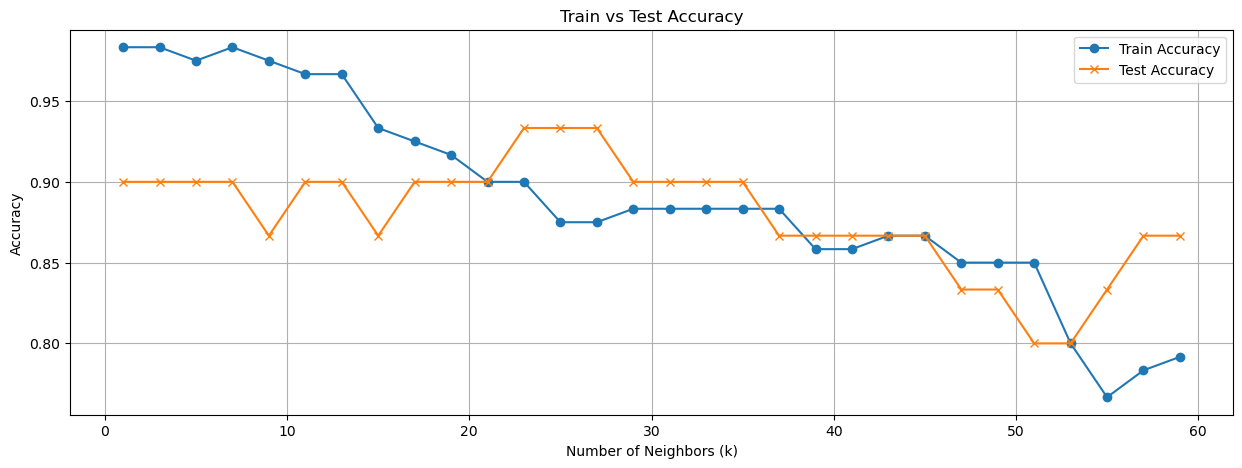

In [7]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

np.random.seed= 2021
iris = load_iris()
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

score_dict = {}
for i in [x for x in range(1, 60) if x%2 == 1]:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaler, y_train)
    score_train_accuracy = np.mean(cross_val_score(model, X_train_scaler, y_train, cv=3, scoring='accuracy'))
    score_test_accuracy = accuracy_score(y_test, model.predict(X_test_scaler))
    
    score_dict[i] = [score_train_accuracy, score_test_accuracy]
                     
df_score = pd.DataFrame(score_dict).T
df_score = df_score.rename(columns={0: 'Train Accuracy', 1: 'Test Accuracy'})
plt.figure(figsize=(15, 5))
plt.plot(df_score.index, df_score['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(df_score.index, df_score['Test Accuracy'], label='Test Accuracy', marker='x')
plt.title('Train vs Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [20]:
k_best = df_score[df_score['Test Accuracy'] == df_score['Test Accuracy'].max()].index[0]
score_best = df_score['Test Accuracy'].max()
print ('The best k = {} , score = {:.3f}'.format(k_best,score_best ))

The best k = 23 , score = 0.933


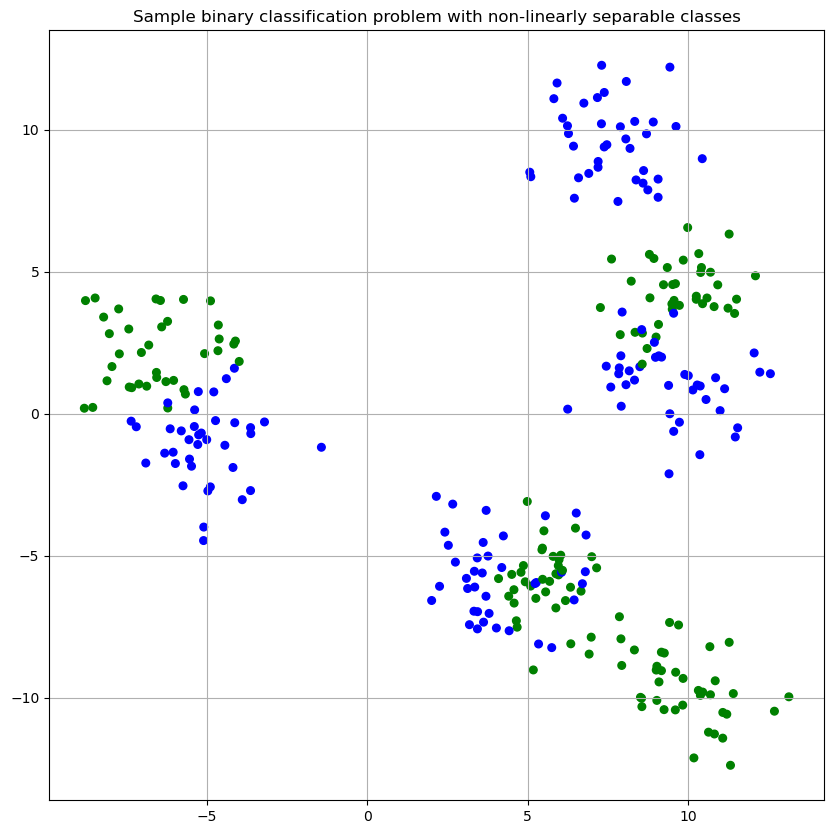

In [21]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure(figsize=(10, 10))
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)
plt.grid(True)
plt.show()

The best k = {'n_neighbors': 5, 'weights': 'distance'} , score = 0.9166666666666666


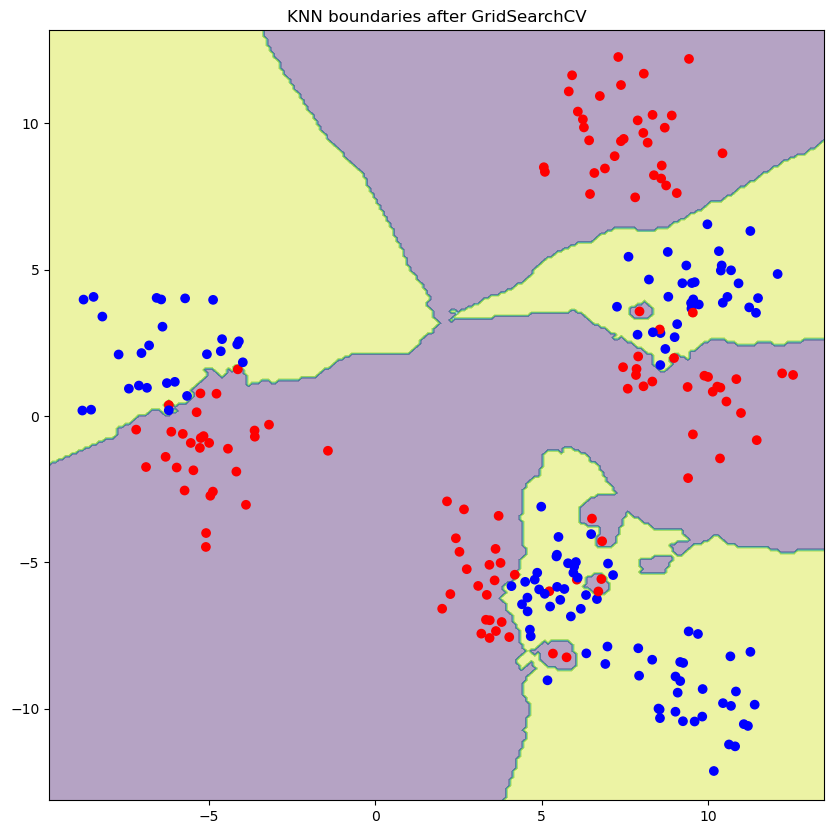

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
import numpy as np

np.random.seed= 2021
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y = y % 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

params = {'n_neighbors': [x for x in range(1, 60) if x%2 == 1],
          'weights': ['uniform', 'distance']}

gs = GridSearchCV(knn, param_grid=params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

k_best = gs.best_params_
score_best = gs.score(X_test, y_test)
print ('The best k = {} , score = {}'.format(k_best,score_best ))
knn_best = gs.best_estimator_ 

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
            cmap=ListedColormap(['r', 'g', 'b']))
plt.title('KNN boundaries after GridSearchCV')
plt.show()